# Dataset Exploring and Environment setup

### Explore data and find out size of the dataset, number of columns, type of each column.

In [3]:
import pandas as pd


df = pd.read_csv("train.csv")
print("The size of dataset is {}.".format(df.size))
print("There are {} rows in dataset.".format(df.shape[0]))
print("There are {} columns in dataset.\n".format(df.shape[1]))

for i, col in enumerate(df.columns):
    print("Column {}:".format(i))
    print("Name: {} Type: {}, Example: {}".format('"' + col + '",', df.dtypes[i], df[col][0]))

The size of dataset is 128856.
There are 10738 rows in dataset.
There are 12 columns in dataset.

Column 0:
Name: "customer_id", Type: object, Example: csid_1
Column 1:
Name: "customer_visit_score", Type: float64, Example: 13.168424934582866
Column 2:
Name: "customer_product_search_score", Type: float64, Example: 9.447661690795815
Column 3:
Name: "customer_ctr_score", Type: float64, Example: -0.0702026428938979
Column 4:
Name: "customer_stay_score", Type: float64, Example: -0.1395408792861613
Column 5:
Name: "customer_frequency_score", Type: float64, Example: 0.4369560308164117
Column 6:
Name: "customer_product_variation_score", Type: float64, Example: 4.705760939212163
Column 7:
Name: "customer_order_score", Type: float64, Example: 2.537985051869976
Column 8:
Name: "customer_affinity_score", Type: float64, Example: 7.959503221378464
Column 9:
Name: "customer_active_segment", Type: object, Example: C
Column 10:
Name: "X1", Type: object, Example: F
Column 11:
Name: "customer_category", 

# Data Visualization

### For every categorical variable build a barplot, for every numerical value build boxplot.

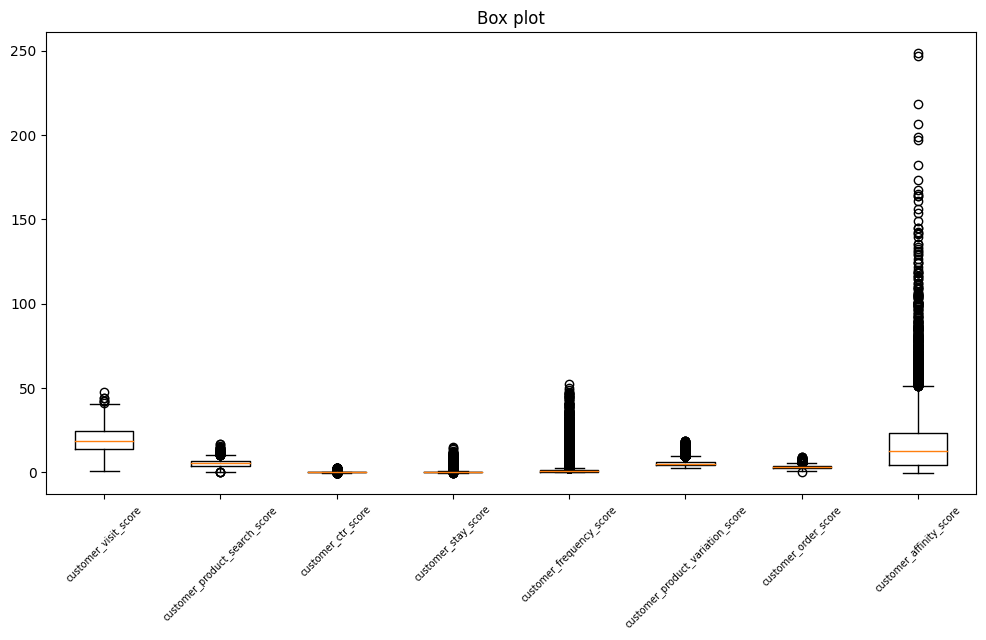

Mean:
customer_visit_score                19.060941
customer_product_search_score        5.261704
customer_ctr_score                   0.175912
customer_stay_score                  0.373963
customer_frequency_score             2.376895
customer_product_variation_score     5.781843
customer_order_score                 3.149646
customer_affinity_score             17.061836
customer_category                    0.120600
dtype: float64


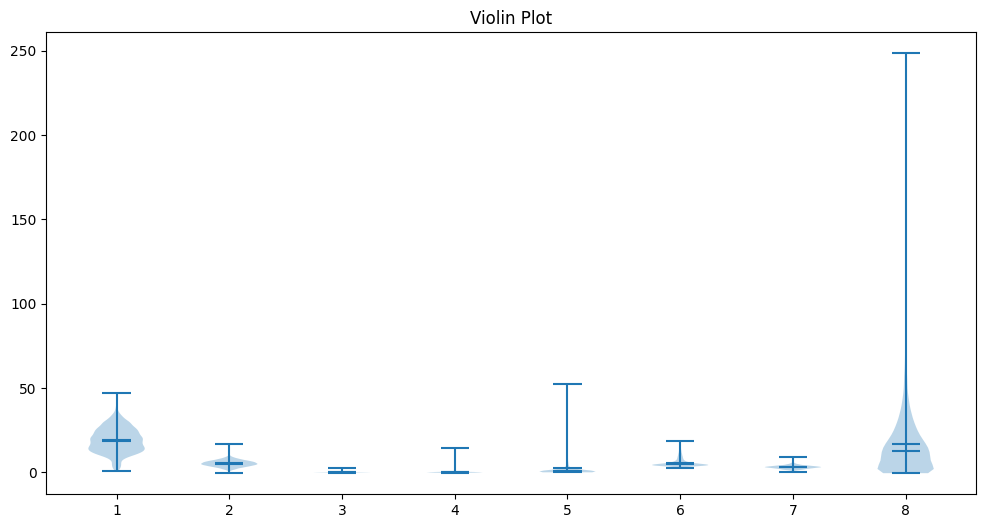

Standard deviation:
customer_visit_score                 7.419609
customer_product_search_score        1.890545
customer_ctr_score                   0.372829
customer_stay_score                  1.219932
customer_frequency_score             5.601911
customer_product_variation_score     2.527728
customer_order_score                 1.032242
customer_affinity_score             18.762693
customer_category                    0.325677
dtype: float64




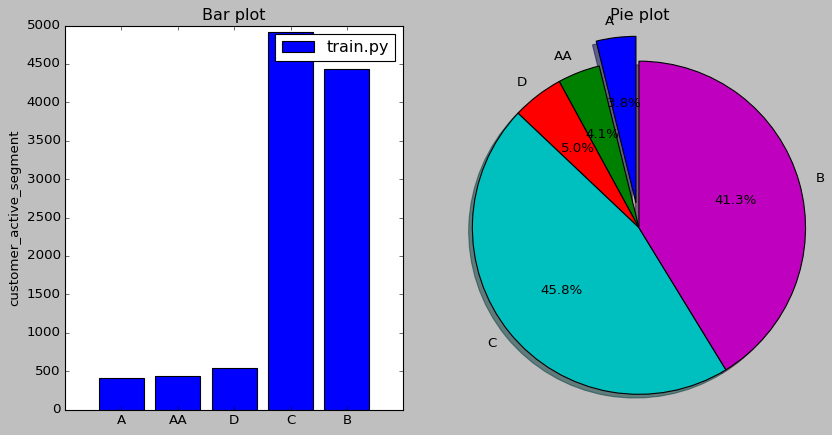

Frequency:
C     4919
B     4430
D      536
AA     441
A      412
Name: customer_active_segment, dtype: int64




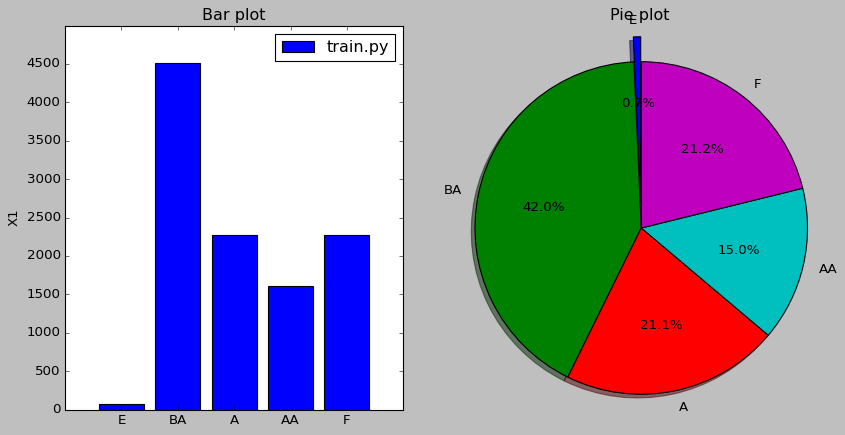

Frequency:
BA    4511
F     2272
A     2268
AA    1611
E       76
Name: X1, dtype: int64




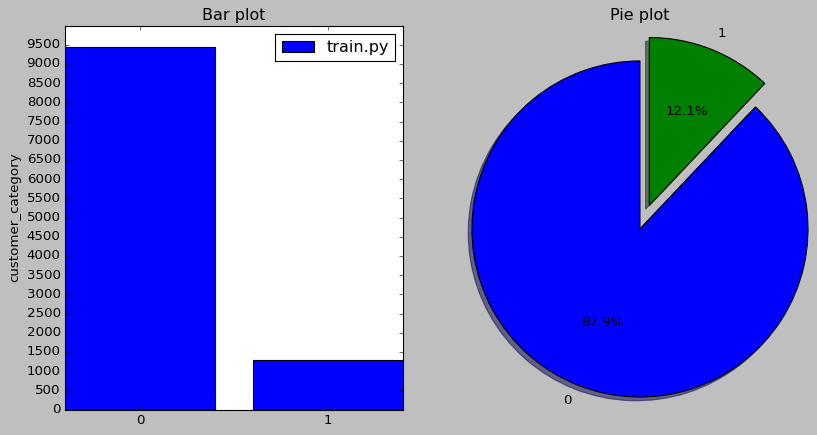

Frequency:
0    9443
1    1295
Name: customer_category, dtype: int64




In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


cat_cols = df.columns[-3:]
num_cols = df.columns[1:-3]

# remove Null values from a data frame
for col in df.columns:
    df[col] = df[col].fillna(np.random.choice(df[col].unique()))

# build a plot for every numerical value
# boxplot
plt.style.use('default') 
fig1, ax1 = plt.subplots(figsize=(12, 6))   
ax1.set_xticklabels(num_cols, rotation=45, fontsize=7)
ax1.boxplot(df[num_cols])
ax1.set_title("Box plot")
plt.show()

# calculate statistics
print("Mean:")
print(df.mean())

# violinplot
fig2, ax2 = plt.subplots(figsize=(12, 6)) 
ax2.violinplot(df[num_cols], showmeans=True, showmedians=True)
ax2.set_title('Violin Plot')
plt.show()

print("Standard deviation:")
print(df.std())
print("\n")

# build a plot for every categorical value
plt.style.use('classic') 
for col in cat_cols:
    data = df[col]
    x = set(data)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    # barplot
    y = []
    for i in x:
        y.append(list(data).count(i))
            
    ind = np.arange(len(x))
    axes[0].bar(ind, y)
    axes[0].set_ylabel(col)
    axes[0].set_title('Bar plot')
    axes[0].set_xticks(ind)
    axes[0].set_xticklabels(x)
    axes[0].set_yticks(np.arange(0, max(y) + 200, 500))
    axes[0].legend(handles=[mpatches.Patch(label='train.py')])   
        
    # pieplot
    labels = list(x)
    explode = [0.15] + [0 for i in range(len(x) - 1)]
    axes[1].set_title('Pie plot')
    axes[1].pie(y, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    axes[1].axis('equal') 
    plt.show()
    
    print("Frequency:")
    print(data.value_counts())
    print("\n")


### Normalize data. Calculate statistics (mean, standard deviation, correlation matrix, frequency) where possible.

In [5]:
normalized_df = df.copy()
normalized_df[num_cols] = normalized_df[num_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

normalized_df

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,C,F,0
1,csid_2,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,C,A,0
2,csid_3,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,C,BA,0
3,csid_4,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,AA,F,0
4,csid_5,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,C,AA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10733,csid_10734,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,C,BA,0
10734,csid_10735,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,C,BA,0
10735,csid_10736,0.665584,0.473913,0.189297,0.028338,0.005529,0.177953,0.233728,0.089749,A,BA,0
10736,csid_10737,0.596367,0.342273,0.140686,0.035879,0.001978,0.054009,0.528128,0.351176,B,AA,0


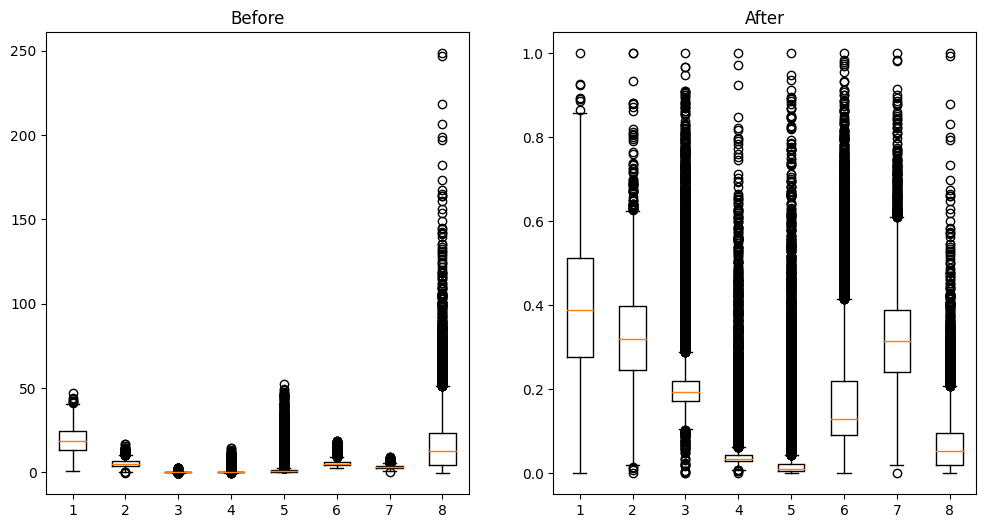

In [6]:
# show the difference between initial and normalized data
plt.style.use('default') 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  

axes[0].boxplot(df[num_cols])
axes[0].set_title("Before")
axes[1].boxplot(normalized_df[num_cols])
axes[1].set_title("After")

plt.show()

In [7]:
# correlation matrix
cor_matr = normalized_df.corr()
cor_matr

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
customer_visit_score,1.000000,0.268757,-0.569430,-0.473146,-0.209270,-0.219302,0.169941,0.118925,-0.449654
customer_product_search_score,0.268757,1.000000,-0.411155,-0.409799,-0.022009,-0.063595,0.049308,0.042659,-0.297576
customer_ctr_score,-0.569430,-0.411155,1.000000,0.907411,0.419461,0.447075,-0.341653,-0.232876,0.794445
customer_stay_score,-0.473146,-0.409799,0.907411,1.000000,0.400019,0.405319,-0.310346,-0.210396,0.678058
customer_frequency_score,-0.209270,-0.022009,0.419461,0.400019,1.000000,0.701970,-0.532332,-0.326201,0.389465
customer_product_variation_score,-0.219302,-0.063595,0.447075,0.405319,0.701970,1.000000,-0.690542,-0.524651,0.492388
customer_order_score,0.169941,0.049308,-0.341653,-0.310346,-0.532332,-0.690542,1.000000,0.762444,-0.384302
customer_affinity_score,0.118925,0.042659,-0.232876,-0.210396,-0.326201,-0.524651,0.762444,1.000000,-0.274105
customer_category,-0.449654,-0.297576,0.794445,0.678058,0.389465,0.492388,-0.384302,-0.274105,1.000000


### Build heat map to see how features correlate with the target value.

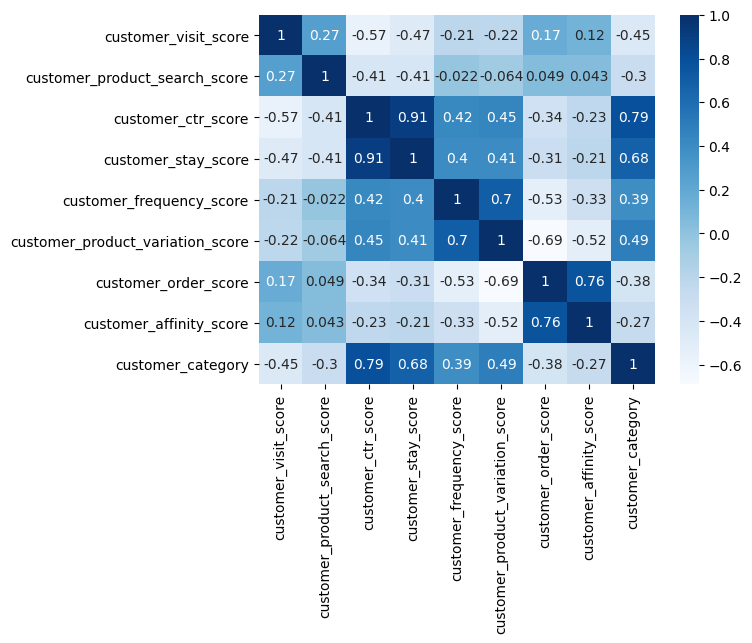

In [8]:
import seaborn as sb

sb.heatmap(cor_matr, annot=True, cmap=plt.cm.Blues)
plt.show()

### Encode all categorical features as integers so that you can use them during model training. 

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# encode categorical features as integers
normalized_df[cat_cols] = normalized_df[cat_cols].apply(lambda x: le.fit_transform(x))

# remove useless column 
normalized_df = normalized_df.drop(["customer_id"], axis=1)

normalized_df

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,3,4,0
1,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,3,0,0
2,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,3,2,0
3,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,1,4,0
4,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10733,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,3,2,0
10734,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,3,2,0
10735,0.665584,0.473913,0.189297,0.028338,0.005529,0.177953,0.233728,0.089749,0,2,0
10736,0.596367,0.342273,0.140686,0.035879,0.001978,0.054009,0.528128,0.351176,2,1,0


# Random Forest

### Resolving outliers, partially absent data, format mismatch.

In [10]:
from scipy.stats import zscore

filtered = normalized_df.copy()
filtered = filtered[(np.abs(zscore(filtered)) < 3).all(axis=1)]
filtered

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,3,4,0
1,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,3,0,0
2,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,3,2,0
3,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,1,4,0
4,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10731,0.610325,0.390081,0.153900,0.025240,0.007759,0.127516,0.215561,0.027057,2,2,0
10732,0.301578,0.327601,0.183398,0.022250,0.004592,0.113201,0.380645,0.058437,3,0,0
10733,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,3,2,0
10734,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,3,2,0


### Make customers classification provided in the dataset by applying Random Forest classifier. For each class print: precision, recall, accuracy.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

forest_clf = RandomForestClassifier(n_estimators=100)

X = filtered.copy()
X = X.drop(['customer_category'], 1)
y = filtered['customer_category']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train the model on training data
forest_clf.fit(X_train, y_train)
y_predicted = forest_clf.predict(X_test)

print("Precision: ", metrics.precision_score(y_test, y_predicted))
print("Recall: ", metrics.recall_score(y_test, y_predicted))
print("Accuracy: ", metrics.accuracy_score(y_test, y_predicted))

Precision:  0.8955223880597015
Recall:  0.7843137254901961
Accuracy:  0.9746494066882416


# Feature Selection

### Improve Random Forest classification accuracy by applying Feature Selection algorithms.

In [12]:
from sklearn.feature_selection import SelectKBest, RFE, chi2

# SelectKBest
forest_clf1 = RandomForestClassifier(n_estimators=100)
select = SelectKBest(chi2, k=5)
X_new1 = select.fit_transform(X, y)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new1, y, test_size=0.2)

forest_clf1.fit(X_train1, y_train1)
y_predicted1 = forest_clf1.predict(X_test1)

print("SelectKBest")
print("Precision: ", metrics.precision_score(y_test1, y_predicted1))
print("Recall: ", metrics.recall_score(y_test1, y_predicted1))
print("Accuracy: ", metrics.accuracy_score(y_test1, y_predicted1))

# RFE
forest_clf2 = RandomForestClassifier(n_estimators=100)
rfe = RFE(forest_clf2, n_features_to_select=5)
X_new2 = rfe.fit_transform(X, y)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new2, y, test_size=0.2)

forest_clf2.fit(X_train2, y_train2)
y_predicted2 = forest_clf2.predict(X_test2)

print("\nRFE")
print("Precision: ", metrics.precision_score(y_test2, y_predicted2))
print("Recall: ", metrics.recall_score(y_test2, y_predicted2))
print("Accuracy: ", metrics.accuracy_score(y_test2, y_predicted2))

SelectKBest
Precision:  0.8632478632478633
Recall:  0.7214285714285714
Accuracy:  0.9703344120819849

RFE
Precision:  0.9105691056910569
Recall:  0.7516778523489933
Accuracy:  0.9741100323624595


### Additional: find best parameters

In [13]:
from sklearn.model_selection import RandomizedSearchCV


new_forest = RandomForestClassifier()
params = {
    'n_estimators': [10, 25, 50, 75, 100, 150, 200, 300, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 1, 2, 3, 5, 10, 15, 20, 50, 100],
    'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

best_search = RandomizedSearchCV(new_forest, params)
best_search.fit(X, y)
best_params = best_search.best_params_
print(best_params)

{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100}


In [14]:
best_forest = RandomForestClassifier(n_estimators=300, 
                                     min_samples_split=2, 
                                     min_samples_leaf=1, 
                                     max_features='sqrt', 
                                     max_depth=100)

best_forest.fit(X_train, y_train)
best_predicted = best_forest.predict(X_test)

print("Simple Random Forest: ", metrics.accuracy_score(y_test, y_predicted))
print("Random Forest with best parameters: ", metrics.accuracy_score(y_test, best_predicted))

Simple Random Forest:  0.9746494066882416
Random Forest with best parameters:  0.97680690399137


# Model Evaluation, ROC Curve

### Implement Model Evaluation

Accuracy:
K_Neighbors :  0.9670981661272924
Naive_Bayes :  0.941747572815534
Decision_Tree :  0.9546925566343042
Random_Forest :  0.9741100323624595
SVC :  0.9730312837108953
Regression :  0.9692556634304207

Area under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores:
K_Neighbors :  0.8989271977652514
Naive_Bayes :  0.9335339073901165
Decision_Tree :  0.8652695646159698
Random_Forest :  0.9557161684975773
SVC :  0.9623251220927328
Regression :  0.9522695223494062

Cross validation accuracy:


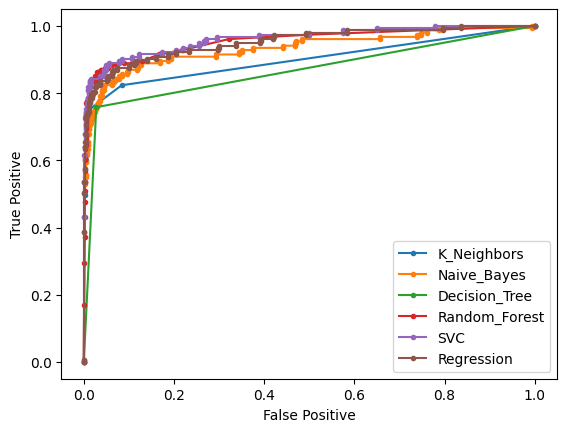

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


# the set of model parameters
param_set = {
    (KNeighborsClassifier(), "K_Neighbors"): [],
    (GaussianNB(), "Naive_Bayes"): [],
    (DecisionTreeClassifier() , "Decision_Tree"): [],
    (RandomForestClassifier(), "Random_Forest"): [],
    (SVC(probability=True, kernel="linear"), "SVC"): [],
    (LogisticRegression(), "Regression"): []
}
# metrics to apply
# (ref, name): [predict, predict_proba, roc_auc_score, roc_curve, cross_val_score]

for key, value in param_set.items():
    model = key[0]
    model.fit(X_train, y_train)
    # predict
    value.append(model.predict(X_test))
    # predict_proba
    proba = model.predict_proba(X_test)[:, 1]
    value.append(proba)
    # roc_auc_score
    value.append(metrics.roc_auc_score(y_test, proba))
    # roc_curve
    pr, tpr, threshold = metrics.roc_curve(y_test, proba)
    value.append([pr, tpr])
    # cross_val_score
    value.append(cross_val_score(model, X, y, cv=5).mean())
    
print("Accuracy:")
for key, value in param_set.items():
    print(key[1], ': ', metrics.accuracy_score(y_test, value[0]))

print("\nArea under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores:")
for key, value in param_set.items(): #roc_auc_score_values:
    print(key[1], ': ', value[2])

print("\nCross validation accuracy:")
for key, value in param_set.items():
    plt.plot(value[3][0], value[3][1], marker='.', label=key[1])

plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()